# Задание 3. Анализ взимосвязей. Коэффициент корреляции и корреляционная матрица

## Цель задания:
### 1. Построить простую модель двумерного распределения
### 2. Получить корреляционную и ковариационную матрицы
### 3. Провести графический анализ корреляционной связи
### 4. Проверить значимость парных коэффициентов корреляции
### 5. Рассчитать и проверить значимость частных коэффициентов корреляции

## 1.Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt # графическая библиотека

In [4]:
from __future__ import division #  деление с дробной частью (модуль из Python 3)

## 2.Загрузка необходимых файлов

In [5]:
pd.set_option('display.max_colwidth',-1)# опция позволяет читать текстовые поля в "необрезанном виде"

In [6]:
imf=pd.read_csv('/home/maxime/Documentos/Econometrics/imf.csv')# загрузка данных IMF в dataframe

In [7]:
ind=pd.read_csv('/home/maxime/Documentos/Econometrics/indicators.csv')#загрузка базы индикаторов в dataframe

In [8]:
ind[ind.Source=='imf']# фильтр индикаторов по источнику - IMF

,Code,Indicator,Source
34,NGDP_R,"Gross domestic product, constant prices/National currency",imf
35,NGDP_RPCH,"Gross domestic product, constant prices/Percent change",imf
36,NGDP,"Gross domestic product, current prices/National currency",imf
37,NGDPD,"Gross domestic product, current prices/U.S. dollars",imf
38,PPPGDP,"Gross domestic product, current prices/Purchasing power parity; international dollars",imf
39,NGDP_D,"Gross domestic product, deflator/Index",imf
40,NGDPRPC,"Gross domestic product per capita, constant prices/National currency",imf
41,NGDPRPPPPC,"Gross domestic product per capita, constant prices/Purchasing power parity; 2011 international dollar",imf
42,NGDPPC,"Gross domestic product per capita, current prices/National currency",imf
43,NGDPDPC,"Gross domestic product per capita, current prices/U.S. dollars",imf


## 3. Выбор показателей для дальнейшего анализа и преобразование dataframe в необходимый формат

In [9]:
list_ind=list(ind.iloc[[35,44,51],0])
# выберем следующие показатели: темп прироста ВВП, индекс инфляции и паритет покупательной способности (ППС)

In [10]:
imf_reduced=imf[imf['WEO Subject Code'].isin(list_ind)].drop(imf.columns[[0,3,4,5,6,7,8,53,55]],axis=1)
# далее осуществляем преобразование из широкого формата в длинный

In [11]:
imf_reduced.head()

,ISO,WEO Subject Code,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,continent
1,AFG,NGDP_RPCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.988,2.164,2.665,2.300,3.024,3.521,4.018,4.515,5.012,Asia
10,AFG,PPPPC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,905.222","1,915.519","1,954.661","2,018.228","2,095.057","2,180.915","2,279.104","2,393.526","2,527.847",Asia
17,AFG,PCPIPCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.662,4.384,4.976,3.000,4.000,5.038,5.000,5.000,5.000,Asia
46,ALB,NGDP_RPCH,2.684,5.700,2.900,1.100,2.000,-1.500,5.600,-0.800,...,2.219,3.352,3.841,3.998,3.719,3.880,3.932,3.959,3.959,Europe
55,ALB,PPPPC,"2,014.126","2,284.832","2,444.573","2,516.946","2,606.114","2,593.859","2,739.785","2,730.855",...,"11,305.287","11,830.877","12,518.937","13,330.165","14,142.990","14,995.743","15,900.826","16,864.698","17,899.465",Europe


In [12]:
col_=[str(i) for i in range(1980,2018)]
imf_long=pd.melt(imf_reduced,id_vars=['ISO','WEO Subject Code'],value_vars=col_)

In [13]:
imf_long.columns=['Country','Indicator','Year','Value']

In [14]:
imf_long.head()

,Country,Indicator,Year,Value
0,AFG,NGDP_RPCH,1980,NaN
1,AFG,PPPPC,1980,NaN
2,AFG,PCPIPCH,1980,NaN
3,ALB,NGDP_RPCH,1980,2.684
4,ALB,PPPPC,1980,"2,014.126"


In [15]:
imf_long['Value']=imf_long['Value'].apply(lambda x:str(x).replace(',',''))
imf_long['Value']=pd.to_numeric(imf_long['Value'],errors='coerce')
imf_long['Year']=pd.to_numeric(imf_long['Year'],errors='coerce')
# преобразование полей с номером года и значением показателя в числовой тип

In [16]:
df=imf_long[imf_long.Year==2016].drop(columns='Year')
# создадим вспомогательный dataframe для дальнейшего преобразования в широкий формат

In [17]:
df.tail()

,Country,Indicator,Value
21529,ZMB,PPPPC,3913.352
21530,ZMB,PCPIPCH,17.869
21531,ZWE,NGDP_RPCH,0.665
21532,ZWE,PPPPC,2235.783
21533,ZWE,PCPIPCH,-1.566


In [18]:
imf_wide=df.pivot_table(index=['Country'],columns=['Indicator'],values=['Value'])
# преобразование в широкий формат по аналогии с первым заданием

In [19]:
col_names=['Country']+list(imf_wide.columns.get_level_values(1))

In [20]:
imf_wide.columns=imf_wide.columns.get_level_values(0) 

In [21]:
imf_wide=imf_wide.reset_index()

In [22]:
col_names

['Country', 'NGDP_RPCH', 'PCPIPCH', 'PPPPC']

In [23]:
imf_wide.columns=col_names

In [24]:
imf_wide.head()

,Country,NGDP_RPCH,PCPIPCH,PPPPC
0,ABW,-0.124,-0.888,36507.036
1,AFG,2.164,4.384,1915.519
2,AGO,-2.580,30.694,7085.996
3,ALB,3.352,1.275,11830.877
4,ARE,2.988,1.617,68750.352


## 4.Построение модели дискретного совместного и условного распределений

In [25]:
np.max(imf_wide.PPPPC),np.min(imf_wide.PPPPC)
# справочно найдем максимальное и минимально значения показателя ППС

(125307.644, 652.48099999999999)

In [26]:
imf_wide['PPPPC'].idxmax()
# найдем индекс (номер) элемента с максимальным  значением показателя ППС

143

In [27]:
imf_wide.loc[143]

Country      QAT   
NGDP_RPCH    2.131 
PCPIPCH      2.677 
PPPPC        125308
Name: 143, dtype: object

In [28]:
imf_wide.dropna(inplace=True)# удалим значения nan

In [29]:
imf_wide.isna().sum()

Country      0
NGDP_RPCH    0
PCPIPCH      0
PPPPC        0
dtype: int64

### Преобразуем количественные непрерывные переменные в порядковые переменные (данные перменные можно также отнести к типу интервальных)

### Процентный прирост ВВП

In [30]:
bins_1=np.append(np.append(min(imf_wide['NGDP_RPCH'])-1,
                    np.percentile(imf_wide['NGDP_RPCH'],np.linspace(25,75,3))),max(imf_wide['NGDP_RPCH'])+1)
# создадим массив, содержащий границы интервалов
# в качестве границ интервалов возьмем минимальное, максимальное наблюдение и процентные точки (функция percentile)

In [31]:
bins_1

array([-17.456 ,   1.4325,   2.935 ,   4.408 ,  14.062 ])

In [32]:
growth_cut=pd.cut(imf_wide['NGDP_RPCH'],bins=bins_1,labels=['low','middle','upper','high'],retbins=True)
# создадим новую порядковую переменную для прироста ВВП, таким образом, что каждая страна 
# попадет в одну из групп по уровню прироста ВВП "низкий","средний","выше среднего", "высокий"                

In [33]:
growth_cut[0].isna().sum()

0

In [34]:
growth_cut[1]# интервалы

array([-17.456 ,   1.4325,   2.935 ,   4.408 ,  14.062 ])

In [35]:
growth_cut[0].head()#  новая порядковая переменная для прироста ВВП

0    low   
1    middle
2    low   
3    upper 
4    upper 
Name: NGDP_RPCH, dtype: category
Categories (4, object): [low < middle < upper < high]

### Паритет покупательной способности

In [36]:
bins_2=np.append(np.append(min(imf_wide['PPPPC'])-1,
                    np.percentile(imf_wide['PPPPC'],np.linspace(25,75,3))),max(imf_wide['PPPPC'])+1)
# создадим массив, содержащий границы интервалов
# в качестве границ интервалов возьмем минимальное, максимальное наблюдение и процентные точки (функция percentile)

In [37]:
bins_2

array([    651.481 ,    4116.8775,   12357.197 ,   28438.121 ,  125308.644 ])

In [38]:
PPP_cut=pd.cut(imf_wide['PPPPC'],bins=bins_2,labels=['low','middle','upper','high'],retbins=True)
# создадим новую порядковую переменную для ППС, таким образом, что каждая страна 
# попадет в одну из групп по уровню ППС "низкий","средний","выше среднего", "высокий"                

In [39]:
PPP_cut[0].isna().sum()

0

In [40]:
PPP_cut[1]# интервалы

array([    651.481 ,    4116.8775,   12357.197 ,   28438.121 ,  125308.644 ])

In [41]:
PPP_cut[0].head()#  новая порядковая переменная для прироста ВВП

0    high  
1    low   
2    middle
3    middle
4    high  
Name: PPPPC, dtype: category
Categories (4, object): [low < middle < upper < high]

In [42]:
total=imf_wide.shape[0] # вспомогательная переменная - общее количество наблюдений

### Совместное распределение показателей темпа прироста ВВП и ППС

In [43]:
joint_distr=pd.crosstab(growth_cut[0],PPP_cut[0],margins=True).apply(lambda x:x/total)
# специальная процедура cross-tab для постоения сводной таблицы

In [44]:
joint_distr

PPPPC,low,middle,upper,high,All
NGDP_RPCH,,,,,
low,0.047120,0.073298,0.057592,0.073298,0.251309
middle,0.047120,0.036649,0.057592,0.109948,0.251309
upper,0.057592,0.062827,0.078534,0.047120,0.246073
high,0.099476,0.078534,0.052356,0.020942,0.251309
All,0.251309,0.246073,0.251309,0.251309,1.000000


### Столбец All показывает распределение показателя темп прироста ВВП (без относительно  показателя ППС), соответственно  строка All показывает распределение показателя ППС (без относительно  показателя темп прироста)

### Условное распределение переменной темп роста ВВП

### Для перехода от совместного распределения к условному воспользуемся известной формулой из теории вероятностией $P(A|B)=\frac{(P(A\cap B)}{P(B)}$. У данной формулы есть аналог для плотности распределения.

In [45]:
PPP_distr=list(PPP_cut[0].value_counts()/total)

In [46]:
PPP_distr

[0.2513089005235602,
 0.2513089005235602,
 0.2513089005235602,
 0.24607329842931938]

In [47]:
cond_distr=joint_distr.iloc[0:4,0:4].div(PPP_distr,0) # переход к условному распределению

In [48]:
cond_distr

PPPPC,low,middle,upper,high
NGDP_RPCH,,,,
low,0.187500,0.291667,0.229167,0.291667
middle,0.187500,0.145833,0.229167,0.437500
upper,0.229167,0.250000,0.312500,0.187500
high,0.404255,0.319149,0.212766,0.085106


In [49]:
row_sum=pd.Series(np.round(cond_distr.iloc[0:4,0:4].sum(0)))
# суммы по строкам для контроля (должны быть равны 1)

In [50]:
row_sum=row_sum.rename('row_sum')

In [51]:
cond_distr.append(row_sum)#  условное распределение перменной темп роста ВВП
# для каждого значения переменной ППС строится отдельное распределение переменной темп роста ВВП

PPPPC,low,middle,upper,high
NGDP_RPCH,,,,
low,0.187500,0.291667,0.229167,0.291667
middle,0.187500,0.145833,0.229167,0.437500
upper,0.229167,0.250000,0.312500,0.187500
high,0.404255,0.319149,0.212766,0.085106
row_sum,1.000000,1.000000,1.000000,1.000000


### Рассмотрим различия между совместным и условным распределениями

$P(NGDPRPCH=low,PPPPC=low)=0.047120$,
$P(NGDPRPCH=low|PPPPC=low)=0.187500$

### В первом случае речь идет о том, что вероятность найти страну с одновременно низким показателем прироста ВВП и низким значением  ППС равна примерно 5%. В то же время вероятность найти страну с низким  показателем прироста ВВП при условии, что страна находится в категории стран с низким значением ППС, равна приблизительно 19%.

## 5.Построение корреляционной модели

In [52]:
imf_wide['log_PPP']=np.log(imf_wide['PPPPC'])# логарифмическое преобразование показателя ППС

### Корреляционное поле

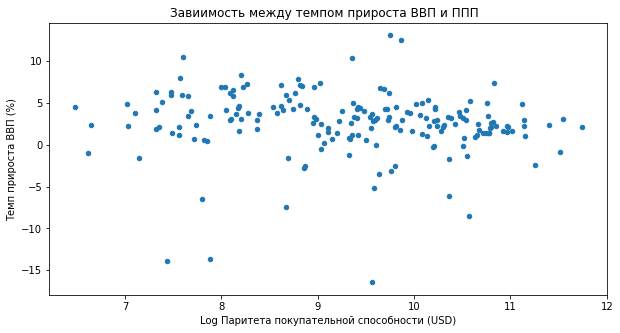

In [53]:
p=imf_wide.plot.scatter(x='log_PPP',y='NGDP_RPCH',title=u'Завиимость между темпом прироста ВВП и ППП  ',figsize=(10,5),)
p.set(xlabel=u'Log Паритета покупательной способности (USD)',ylabel=u'Темп прироста ВВП (%)')

### Вывод: График зависимости (корреляционное поле) между приростом ВВП и ППС не позволил выявить какой-либо связи 

### Корреляционная матрица

In [54]:
corr_matrix=np.corrcoef(imf_wide.iloc[:,[1,2,4]],rowvar=False) # используем numpy

In [55]:
corr_matrix
# на главной диагнонали ковариационной матрицы находятся дисперсии показателей, 
# остальные элементы - парные коэффициенты корреляции (матрица сиимметрична относительно главной диагонали)

array([[ 1.        , -0.48591395, -0.0966812 ],
       [-0.48591395,  1.        , -0.13628617],
       [-0.0966812 , -0.13628617,  1.        ]])

In [56]:
imf_wide.iloc[:,[1,2,4]].corr()# используем pandas

,NGDP_RPCH,PCPIPCH,log_PPP
NGDP_RPCH,1.000000,-0.485914,-0.096681
PCPIPCH,-0.485914,1.000000,-0.136286
log_PPP,-0.096681,-0.136286,1.000000


### Ковариационная матрица

In [57]:
np.cov(imf_wide.iloc[:,[1,2,4]],rowvar=False)

array([[  1.41463811e+01,  -6.08158145e+01,  -4.34667612e-01],
       [ -6.08158145e+01,   1.10730936e+03,  -5.42099261e+00],
       [ -4.34667612e-01,  -5.42099261e+00,   1.42884494e+00]])

In [58]:
np.var(imf_wide['NGDP_RPCH'])# на главной диагнонали ковариационной матрицы находятся дисперсии показателей

14.072316305364438

### Вспомогательная функция для определения значимости парного коэффициента корреляции

In [59]:
def r_signif(r,n,two_sided=True):
    t=(r/((1-r**2)**0.5))*((n-2)**0.5)
    pvalue=stats.t.cdf(t,n-2)
    if t>0:
        pvalue=1-pvalue
    if two_sided:
        pvalue=2*pvalue
    return(t,pvalue)

### Определение значимости парного коэффициента корреляции ($\alpha=0.05$)

$H_0:\rho=0$
$H_1:\rho\neq0$

In [60]:
k=corr_matrix.shape[0]
for i in range(0,k):
    for j in range(i+1,k):
        t,pvalue=r_signif(corr_matrix[i,j],imf_wide.shape[0])
        print('r=%.4f, t=%.4f, pvalue=%.4f'%(corr_matrix[i,j],t,pvalue))

r=-0.4859, t=-7.6432, pvalue=0.0000
r=-0.0967, t=-1.3354, pvalue=0.1834
r=-0.1363, t=-1.8913, pvalue=0.0601


### Вывод: Связь между темпом прироста ВВП и индексом инфляции статистически значима. Связь носит отрицательный характер, т.е. в среднем имеет место тенденция снижения темпов роста при увеличении инфляции. Остальные коэффициенты оказались статистически незначимы.

### Частные коэффициенты корреляции

### Вспомогательная функция для  расчета и определения значимости частных коэффициентов корреляции

In [61]:
def minor(matrix,i,j): # используем корреляционую матрицу
    sub_matrix=np.delete(matrix,(i),axis=0)
    sub_matrix=np.delete(sub_matrix,(j),axis=1)
    return ((-1)**(i+j))*np.linalg.det(sub_matrix)

### Расчет и определение значимости частных коэффициентов корреляции($\alpha=0.05$)

In [62]:
# Расчет частного коэффициента корреляции осуществляется с помощью, так называемых, миноров.
# Справочно: Минор Сij- определитель  под-матрицы корреляционной матрицы,у которой вычеркнуты i-тый столбец и 
# j-тая строка

k=corr_matrix.shape[0]
n=total
for i in range(0,k):
    for j in range(i+1,k):
        r=(-minor(corr_matrix,i,j)/((minor(corr_matrix,i,i)*minor(corr_matrix,j,j))**.5))
        t=np.abs(r)*((n-k)/(1-r**2))**0.5
        pvalue=2*(1-stats.t.cdf(t,n-k))
        print('r('+str(i)+','+str(j)+')=%.4f t=%.4f pvalue=%.4f'%(r,t,pvalue))

r(0,1)=-0.5062 t=8.0471 pvalue=0.0000
r(0,2)=-0.1881 t=2.6266 pvalue=0.0093
r(1,2)=-0.2107 t=2.9549 pvalue=0.0035


In [63]:
(corr_matrix[0,2]-corr_matrix[0,1]*corr_matrix[1,2])/(((1-corr_matrix[0,1]**2)*(1-corr_matrix[1,2]**2))**.5)
# расчет частного коэффициента корреляции с помощью формулы

-0.1881437032121423

### Вывод: В отличие от парных коэффициентов корреляции все частные коэффциенты корреляции значимы. Для примера рассмотрим частный коэффициент корреляции между темпом прироста ВВП и ППС, т.е. корреляцию без учета влияния индекса инфляции. Частный коэффициент корреляции больше по абсолютной величине чем соответствующий парный, это говорит о том, что индекс инфляции ослабляет связь между указанными переменными.

In [ ]:
## Задание

## Для выполнения задания необходимо взять два экономических индикатора 
### 1. Построить модель совмнестного распределения двух экономических индикаторов
## Для выполнения задания необходимо взять три экономических индикатора 
### 2. Построить корреляционное поле для всех парных комбинаций показателей
### 3. Получить ковариационную и корреляционную матрицы
### 4. Проверить значимость парных коэффициентов корреляции
### 5. Рассчитать и проверить значимость всех частных коэффициентов корреляци
### 6. Попробовать самостоятельно посчитать коэффициенты ранговой корреляции (Спирмэна и Кэнделла)
### 7. Повторить или посмотреть материал по основам линейной алгебры
### 8. Сделать выводы